In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('InterpolatedWithCAPEX2.csv')

In [3]:
df

,Dates,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [4]:
max = {'D REVENUE':df['D REVENUE'].max(), 'U CR':df['U CR'].max(), 'D OE':df['D OE'].max(), 
       'D NOI':df['D NOI'].max(),'U CAPEX':df['U CAPEX'].max(), 'U CWK':df['U CWK'].max()} 
min = {'D REVENUE':df['D REVENUE'].min(), 'U CR':df['U CR'].min(), 'D OE':df['D OE'].min(), 
       'D NOI':df['D NOI'].min(),'U CAPEX':df['U CAPEX'].min(), 'U CWK':df['U CWK'].min()} 
filas, columnas = df.count()-1, len(df.columns)-1
dataset = df.values
DFCF = dataset[filas, columnas][1]
print(DFCF)
x1 = df['D REVENUE'].corr(df['D FCF']) 
print(x1)

753.612931
-0.4658808455080132


In [5]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [6]:
X = dataset[:,1:5]
Y = dataset[:,5]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [8]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        ],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 ],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        ],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 ],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  ],
       [0.17164397, 0.37286814, 0.        , 0.1304085 ],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337],
       [0.21746656, 0.38558854, 0.11986831, 0.15491825],
       [0.24037786, 0.39194874, 0.17980247, 0.16717312],
       [0.18782438, 0.37456299, 0.15952074, 0.15377192],
       [0.1352709 , 0.35717725, 0.13923902, 0.14037072],
       [0.08271742, 0.33979151, 0.1189573 , 0.12696952],
       [0.09769806, 0.30789075, 0.12775618, 0.12639516],
       [0.11267869, 0.27598999,

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 4) (11, 4) (11, 4) (87,) (11,) (11,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(4,)),
    Dense(32, activation='elu'),
    Dense(12, activation='elu'),
    Dense(1, activation='elu'),
])
#softplus, selu, elu

In [13]:
model.compile(optimizer='adam',
              loss='mean_absolute_error')

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=64, epochs=1500,
          validation_data=(X_val, Y_val), verbose=1)

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 0s 3ms/step - loss: 180.6163 - val_loss: 223.3942
Epoch 2/1500
87/87 [==============================] - 0s 103us/step - loss: 180.4944 - val_loss: 223.2666
Epoch 3/1500
87/87 [==============================] - 0s 92us/step - loss: 180.3705 - val_loss: 223.1367
Epoch 4/1500
87/87 [==============================] - 0s 80us/step - loss: 180.2464 - val_loss: 223.0042
Epoch 5/1500
87/87 [==============================] - 0s 126us/step - loss: 180.1182 - val_loss: 222.8689
Epoch 6/1500
87/87 [==============================] - 0s 92us/step - loss: 179.9869 - val_loss: 222.7302
Epoch 7/1500
87/87 [==============================] - 0s 92us/step - loss: 179.8520 - val_loss: 222.5877
Epoch 8/1500
87/87 [==============================] - 0s 92us/step - loss: 179.7142 - val_loss: 222.4410
Epoch 9/1500
87/87 [==============================] - 0s 92us/step - loss: 179.5708 - val_loss: 222.2897
Epoch 10/1

Epoch 77/1500
87/87 [==============================] - 0s 115us/step - loss: 142.8198 - val_loss: 183.4788
Epoch 78/1500
87/87 [==============================] - 0s 92us/step - loss: 141.5325 - val_loss: 182.1327
Epoch 79/1500
87/87 [==============================] - 0s 92us/step - loss: 140.2160 - val_loss: 180.7480
Epoch 80/1500
87/87 [==============================] - 0s 92us/step - loss: 138.8625 - val_loss: 179.3238
Epoch 81/1500
87/87 [==============================] - 0s 103us/step - loss: 137.4820 - val_loss: 177.8611
Epoch 82/1500
87/87 [==============================] - 0s 115us/step - loss: 136.0587 - val_loss: 176.3632
Epoch 83/1500
87/87 [==============================] - 0s 103us/step - loss: 134.5815 - val_loss: 174.8287
Epoch 84/1500
87/87 [==============================] - 0s 103us/step - loss: 133.0939 - val_loss: 173.2530
Epoch 85/1500
87/87 [==============================] - 0s 103us/step - loss: 131.5520 - val_loss: 171.6391
Epoch 86/1500
87/87 [===================

87/87 [==============================] - 0s 115us/step - loss: 77.3548 - val_loss: 117.2968
Epoch 154/1500
87/87 [==============================] - 0s 149us/step - loss: 77.2575 - val_loss: 117.1234
Epoch 155/1500
87/87 [==============================] - 0s 115us/step - loss: 77.1394 - val_loss: 116.9691
Epoch 156/1500
87/87 [==============================] - 0s 115us/step - loss: 77.0362 - val_loss: 116.8240
Epoch 157/1500
87/87 [==============================] - 0s 92us/step - loss: 76.9235 - val_loss: 116.6827
Epoch 158/1500
87/87 [==============================] - 0s 126us/step - loss: 76.8547 - val_loss: 116.5420
Epoch 159/1500
87/87 [==============================] - 0s 126us/step - loss: 76.7387 - val_loss: 116.4240
Epoch 160/1500
87/87 [==============================] - 0s 103us/step - loss: 76.6417 - val_loss: 116.3085
Epoch 161/1500
87/87 [==============================] - 0s 103us/step - loss: 76.5517 - val_loss: 116.1922
Epoch 162/1500
87/87 [==============================]

87/87 [==============================] - 0s 103us/step - loss: 70.9758 - val_loss: 106.9340
Epoch 230/1500
87/87 [==============================] - 0s 126us/step - loss: 70.9251 - val_loss: 106.8589
Epoch 231/1500
87/87 [==============================] - 0s 103us/step - loss: 70.8651 - val_loss: 106.7939
Epoch 232/1500
87/87 [==============================] - 0s 103us/step - loss: 70.8109 - val_loss: 106.7094
Epoch 233/1500
87/87 [==============================] - 0s 103us/step - loss: 70.7692 - val_loss: 106.6214
Epoch 234/1500
87/87 [==============================] - 0s 115us/step - loss: 70.7036 - val_loss: 106.5418
Epoch 235/1500
87/87 [==============================] - 0s 138us/step - loss: 70.6445 - val_loss: 106.4233
Epoch 236/1500
87/87 [==============================] - 0s 126us/step - loss: 70.5963 - val_loss: 106.2860
Epoch 237/1500
87/87 [==============================] - 0s 103us/step - loss: 70.5504 - val_loss: 106.1516
Epoch 238/1500
87/87 [==============================

87/87 [==============================] - 0s 103us/step - loss: 67.8591 - val_loss: 104.6747
Epoch 306/1500
87/87 [==============================] - 0s 103us/step - loss: 67.8250 - val_loss: 104.6829
Epoch 307/1500
87/87 [==============================] - 0s 115us/step - loss: 67.7901 - val_loss: 104.6749
Epoch 308/1500
87/87 [==============================] - 0s 127us/step - loss: 67.7540 - val_loss: 104.6807
Epoch 309/1500
87/87 [==============================] - 0s 103us/step - loss: 67.7187 - val_loss: 104.6662
Epoch 310/1500
87/87 [==============================] - 0s 115us/step - loss: 67.6864 - val_loss: 104.6402
Epoch 311/1500
87/87 [==============================] - 0s 126us/step - loss: 67.6523 - val_loss: 104.5853
Epoch 312/1500
87/87 [==============================] - 0s 126us/step - loss: 67.6166 - val_loss: 104.4972
Epoch 313/1500
87/87 [==============================] - 0s 103us/step - loss: 67.6007 - val_loss: 104.4294
Epoch 314/1500
87/87 [==============================

87/87 [==============================] - 0s 103us/step - loss: 65.4256 - val_loss: 103.9998
Epoch 382/1500
87/87 [==============================] - 0s 103us/step - loss: 65.3998 - val_loss: 104.0227
Epoch 383/1500
87/87 [==============================] - 0s 138us/step - loss: 65.3687 - val_loss: 104.0273
Epoch 384/1500
87/87 [==============================] - 0s 115us/step - loss: 65.3392 - val_loss: 104.0482
Epoch 385/1500
87/87 [==============================] - 0s 115us/step - loss: 65.3073 - val_loss: 104.1018
Epoch 386/1500
87/87 [==============================] - 0s 126us/step - loss: 65.2902 - val_loss: 104.1465
Epoch 387/1500
87/87 [==============================] - 0s 115us/step - loss: 65.2534 - val_loss: 104.1612
Epoch 388/1500
87/87 [==============================] - 0s 172us/step - loss: 65.2270 - val_loss: 104.1812
Epoch 389/1500
87/87 [==============================] - 0s 138us/step - loss: 65.1995 - val_loss: 104.1807
Epoch 390/1500
87/87 [==============================

87/87 [==============================] - 0s 103us/step - loss: 63.1540 - val_loss: 104.4207
Epoch 458/1500
87/87 [==============================] - 0s 92us/step - loss: 63.1148 - val_loss: 104.3789
Epoch 459/1500
87/87 [==============================] - 0s 103us/step - loss: 63.0746 - val_loss: 104.3357
Epoch 460/1500
87/87 [==============================] - 0s 115us/step - loss: 63.0382 - val_loss: 104.2934
Epoch 461/1500
87/87 [==============================] - 0s 126us/step - loss: 62.9968 - val_loss: 104.2416
Epoch 462/1500
87/87 [==============================] - 0s 115us/step - loss: 62.9621 - val_loss: 104.1731
Epoch 463/1500
87/87 [==============================] - ETA: 0s - loss: 65.35 - 0s 115us/step - loss: 62.9264 - val_loss: 104.1325
Epoch 464/1500
87/87 [==============================] - 0s 103us/step - loss: 62.8777 - val_loss: 104.1276
Epoch 465/1500
87/87 [==============================] - 0s 80us/step - loss: 62.8422 - val_loss: 104.1161
Epoch 466/1500
87/87 [========

87/87 [==============================] - 0s 103us/step - loss: 58.5583 - val_loss: 103.4860
Epoch 534/1500
87/87 [==============================] - 0s 103us/step - loss: 58.4392 - val_loss: 103.3931
Epoch 535/1500
87/87 [==============================] - 0s 115us/step - loss: 58.3397 - val_loss: 103.3154
Epoch 536/1500
87/87 [==============================] - 0s 92us/step - loss: 58.2106 - val_loss: 103.2695
Epoch 537/1500
87/87 [==============================] - 0s 115us/step - loss: 58.0855 - val_loss: 103.2206
Epoch 538/1500
87/87 [==============================] - 0s 115us/step - loss: 57.9639 - val_loss: 103.1957
Epoch 539/1500
87/87 [==============================] - 0s 92us/step - loss: 57.8450 - val_loss: 103.1788
Epoch 540/1500
87/87 [==============================] - 0s 92us/step - loss: 57.7186 - val_loss: 103.1589
Epoch 541/1500
87/87 [==============================] - 0s 103us/step - loss: 57.6092 - val_loss: 103.1579
Epoch 542/1500
87/87 [==============================] -

Epoch 610/1500
87/87 [==============================] - 0s 103us/step - loss: 45.3793 - val_loss: 107.2341
Epoch 611/1500
87/87 [==============================] - 0s 115us/step - loss: 45.1419 - val_loss: 107.2042
Epoch 612/1500
87/87 [==============================] - 0s 126us/step - loss: 44.9261 - val_loss: 107.2032
Epoch 613/1500
87/87 [==============================] - 0s 103us/step - loss: 44.6828 - val_loss: 107.2598
Epoch 614/1500
87/87 [==============================] - 0s 92us/step - loss: 44.4484 - val_loss: 107.3229
Epoch 615/1500
87/87 [==============================] - 0s 103us/step - loss: 44.1832 - val_loss: 107.4425
Epoch 616/1500
87/87 [==============================] - 0s 126us/step - loss: 43.9309 - val_loss: 107.6235
Epoch 617/1500
87/87 [==============================] - 0s 126us/step - loss: 43.7121 - val_loss: 107.7993
Epoch 618/1500
87/87 [==============================] - 0s 115us/step - loss: 43.4113 - val_loss: 107.9517
Epoch 619/1500
87/87 [================

87/87 [==============================] - 0s 92us/step - loss: 41.0725 - val_loss: 107.1032
Epoch 687/1500
87/87 [==============================] - 0s 103us/step - loss: 41.0623 - val_loss: 107.0927
Epoch 688/1500
87/87 [==============================] - 0s 92us/step - loss: 41.0494 - val_loss: 107.0755
Epoch 689/1500
87/87 [==============================] - 0s 104us/step - loss: 41.0442 - val_loss: 107.0703
Epoch 690/1500
87/87 [==============================] - 0s 115us/step - loss: 41.0233 - val_loss: 107.0845
Epoch 691/1500
87/87 [==============================] - 0s 103us/step - loss: 41.0094 - val_loss: 107.0952
Epoch 692/1500
87/87 [==============================] - 0s 103us/step - loss: 40.9830 - val_loss: 107.0997
Epoch 693/1500
87/87 [==============================] - 0s 126us/step - loss: 40.9705 - val_loss: 107.1044
Epoch 694/1500
87/87 [==============================] - 0s 115us/step - loss: 40.9622 - val_loss: 107.1018
Epoch 695/1500
87/87 [==============================] 

Epoch 763/1500
87/87 [==============================] - 0s 103us/step - loss: 40.1486 - val_loss: 106.4910
Epoch 764/1500
87/87 [==============================] - 0s 103us/step - loss: 40.1268 - val_loss: 106.4618
Epoch 765/1500
87/87 [==============================] - 0s 103us/step - loss: 40.1120 - val_loss: 106.4299
Epoch 766/1500
87/87 [==============================] - 0s 115us/step - loss: 40.0942 - val_loss: 106.4049
Epoch 767/1500
87/87 [==============================] - 0s 103us/step - loss: 40.0804 - val_loss: 106.3808
Epoch 768/1500
87/87 [==============================] - 0s 161us/step - loss: 40.0635 - val_loss: 106.3428
Epoch 769/1500
87/87 [==============================] - 0s 126us/step - loss: 40.0605 - val_loss: 106.3062
Epoch 770/1500
87/87 [==============================] - 0s 115us/step - loss: 40.0577 - val_loss: 106.2961
Epoch 771/1500
87/87 [==============================] - 0s 115us/step - loss: 40.0359 - val_loss: 106.3113
Epoch 772/1500
87/87 [===============

87/87 [==============================] - 0s 149us/step - loss: 39.2988 - val_loss: 105.7157
Epoch 840/1500
87/87 [==============================] - 0s 115us/step - loss: 39.3013 - val_loss: 105.7104
Epoch 841/1500
87/87 [==============================] - 0s 103us/step - loss: 39.2935 - val_loss: 105.7050
Epoch 842/1500
87/87 [==============================] - 0s 103us/step - loss: 39.2908 - val_loss: 105.6927
Epoch 843/1500
87/87 [==============================] - 0s 115us/step - loss: 39.2753 - val_loss: 105.6728
Epoch 844/1500
87/87 [==============================] - 0s 115us/step - loss: 39.2559 - val_loss: 105.6362
Epoch 845/1500
87/87 [==============================] - 0s 115us/step - loss: 39.2156 - val_loss: 105.5885
Epoch 846/1500
87/87 [==============================] - 0s 109us/step - loss: 39.1781 - val_loss: 105.5359
Epoch 847/1500
87/87 [==============================] - 0s 126us/step - loss: 39.1859 - val_loss: 105.4865
Epoch 848/1500
87/87 [==============================

87/87 [==============================] - 0s 149us/step - loss: 38.6758 - val_loss: 105.0979
Epoch 916/1500
87/87 [==============================] - 0s 115us/step - loss: 38.6545 - val_loss: 105.0610
Epoch 917/1500
87/87 [==============================] - 0s 138us/step - loss: 38.6355 - val_loss: 105.0115
Epoch 918/1500
87/87 [==============================] - 0s 103us/step - loss: 38.6548 - val_loss: 104.9770
Epoch 919/1500
87/87 [==============================] - 0s 103us/step - loss: 38.6415 - val_loss: 104.9756
Epoch 920/1500
87/87 [==============================] - 0s 115us/step - loss: 38.6233 - val_loss: 104.9893
Epoch 921/1500
87/87 [==============================] - 0s 138us/step - loss: 38.6009 - val_loss: 105.0112
Epoch 922/1500
87/87 [==============================] - 0s 138us/step - loss: 38.6026 - val_loss: 105.0340
Epoch 923/1500
87/87 [==============================] - 0s 126us/step - loss: 38.6126 - val_loss: 105.0338
Epoch 924/1500
87/87 [==============================

Epoch 992/1500
87/87 [==============================] - 0s 138us/step - loss: 38.2909 - val_loss: 104.6382
Epoch 993/1500
87/87 [==============================] - 0s 138us/step - loss: 38.3239 - val_loss: 104.6471
Epoch 994/1500
87/87 [==============================] - 0s 126us/step - loss: 38.3284 - val_loss: 104.6306
Epoch 995/1500
87/87 [==============================] - 0s 126us/step - loss: 38.2981 - val_loss: 104.6292
Epoch 996/1500
87/87 [==============================] - 0s 115us/step - loss: 38.3023 - val_loss: 104.6153
Epoch 997/1500
87/87 [==============================] - 0s 115us/step - loss: 38.2878 - val_loss: 104.5777
Epoch 998/1500
87/87 [==============================] - 0s 149us/step - loss: 38.2762 - val_loss: 104.5472
Epoch 999/1500
87/87 [==============================] - 0s 184us/step - loss: 38.2830 - val_loss: 104.5315
Epoch 1000/1500
87/87 [==============================] - 0s 138us/step - loss: 38.2799 - val_loss: 104.5306
Epoch 1001/1500
87/87 [=============

87/87 [==============================] - 0s 92us/step - loss: 38.1564 - val_loss: 104.3448
Epoch 1069/1500
87/87 [==============================] - 0s 92us/step - loss: 38.1567 - val_loss: 104.3384
Epoch 1070/1500
87/87 [==============================] - 0s 103us/step - loss: 38.1537 - val_loss: 104.3270
Epoch 1071/1500
87/87 [==============================] - 0s 103us/step - loss: 38.1492 - val_loss: 104.3091
Epoch 1072/1500
87/87 [==============================] - 0s 92us/step - loss: 38.1555 - val_loss: 104.2844
Epoch 1073/1500
87/87 [==============================] - 0s 103us/step - loss: 38.1504 - val_loss: 104.2884
Epoch 1074/1500
87/87 [==============================] - 0s 103us/step - loss: 38.1414 - val_loss: 104.3084
Epoch 1075/1500
87/87 [==============================] - 0s 92us/step - loss: 38.1379 - val_loss: 104.3382
Epoch 1076/1500
87/87 [==============================] - 0s 138us/step - loss: 38.1528 - val_loss: 104.3783
Epoch 1077/1500
87/87 [=========================

87/87 [==============================] - 0s 103us/step - loss: 38.0691 - val_loss: 104.0784
Epoch 1144/1500
87/87 [==============================] - 0s 140us/step - loss: 38.0540 - val_loss: 104.0797
Epoch 1145/1500
87/87 [==============================] - 0s 115us/step - loss: 38.0536 - val_loss: 104.0893
Epoch 1146/1500
87/87 [==============================] - 0s 138us/step - loss: 38.0440 - val_loss: 104.1116
Epoch 1147/1500
87/87 [==============================] - 0s 103us/step - loss: 38.0584 - val_loss: 104.1234
Epoch 1148/1500
87/87 [==============================] - 0s 126us/step - loss: 38.0681 - val_loss: 104.1289
Epoch 1149/1500
87/87 [==============================] - 0s 126us/step - loss: 38.0741 - val_loss: 104.1257
Epoch 1150/1500
87/87 [==============================] - 0s 115us/step - loss: 38.0713 - val_loss: 104.1094
Epoch 1151/1500
87/87 [==============================] - 0s 138us/step - loss: 38.0637 - val_loss: 104.0772
Epoch 1152/1500
87/87 [=====================

87/87 [==============================] - 0s 103us/step - loss: 38.0209 - val_loss: 103.8108
Epoch 1219/1500
87/87 [==============================] - 0s 149us/step - loss: 38.0253 - val_loss: 103.8209
Epoch 1220/1500
87/87 [==============================] - 0s 115us/step - loss: 38.0164 - val_loss: 103.8207
Epoch 1221/1500
87/87 [==============================] - 0s 126us/step - loss: 38.0014 - val_loss: 103.8062
Epoch 1222/1500
87/87 [==============================] - 0s 115us/step - loss: 38.0180 - val_loss: 103.8015
Epoch 1223/1500
87/87 [==============================] - 0s 115us/step - loss: 38.0001 - val_loss: 103.8303
Epoch 1224/1500
87/87 [==============================] - 0s 138us/step - loss: 37.9868 - val_loss: 103.8806
Epoch 1225/1500
87/87 [==============================] - 0s 149us/step - loss: 37.9711 - val_loss: 103.9260
Epoch 1226/1500
87/87 [==============================] - 0s 138us/step - loss: 38.0298 - val_loss: 103.9602
Epoch 1227/1500
87/87 [=====================

87/87 [==============================] - 0s 115us/step - loss: 37.9066 - val_loss: 103.7065
Epoch 1295/1500
87/87 [==============================] - 0s 92us/step - loss: 37.9106 - val_loss: 103.7153
Epoch 1296/1500
87/87 [==============================] - 0s 115us/step - loss: 37.9031 - val_loss: 103.7084
Epoch 1297/1500
87/87 [==============================] - 0s 103us/step - loss: 37.9063 - val_loss: 103.7031
Epoch 1298/1500
87/87 [==============================] - 0s 103us/step - loss: 37.9100 - val_loss: 103.7030
Epoch 1299/1500
87/87 [==============================] - 0s 115us/step - loss: 37.9022 - val_loss: 103.6875
Epoch 1300/1500
87/87 [==============================] - 0s 115us/step - loss: 37.8993 - val_loss: 103.6870
Epoch 1301/1500
87/87 [==============================] - 0s 138us/step - loss: 37.9007 - val_loss: 103.6912
Epoch 1302/1500
87/87 [==============================] - 0s 126us/step - loss: 37.8939 - val_loss: 103.6894
Epoch 1303/1500
87/87 [======================

87/87 [==============================] - 0s 115us/step - loss: 37.8601 - val_loss: 103.4262
Epoch 1371/1500
87/87 [==============================] - 0s 103us/step - loss: 37.8753 - val_loss: 103.4212
Epoch 1372/1500
87/87 [==============================] - 0s 103us/step - loss: 37.8781 - val_loss: 103.4342
Epoch 1373/1500
87/87 [==============================] - 0s 115us/step - loss: 37.8563 - val_loss: 103.4519
Epoch 1374/1500
87/87 [==============================] - 0s 126us/step - loss: 37.8275 - val_loss: 103.4933
Epoch 1375/1500
87/87 [==============================] - 0s 126us/step - loss: 37.8184 - val_loss: 103.5438
Epoch 1376/1500
87/87 [==============================] - 0s 126us/step - loss: 37.8244 - val_loss: 103.5916
Epoch 1377/1500
87/87 [==============================] - 0s 103us/step - loss: 37.8476 - val_loss: 103.6239
Epoch 1378/1500
87/87 [==============================] - 0s 115us/step - loss: 37.8811 - val_loss: 103.6287
Epoch 1379/1500
87/87 [=====================

87/87 [==============================] - 0s 103us/step - loss: 37.7421 - val_loss: 103.2863
Epoch 1446/1500
87/87 [==============================] - 0s 115us/step - loss: 37.7512 - val_loss: 103.2620
Epoch 1447/1500
87/87 [==============================] - 0s 92us/step - loss: 37.7513 - val_loss: 103.2516
Epoch 1448/1500
87/87 [==============================] - 0s 103us/step - loss: 37.7520 - val_loss: 103.2384
Epoch 1449/1500
87/87 [==============================] - 0s 115us/step - loss: 37.7595 - val_loss: 103.2311
Epoch 1450/1500
87/87 [==============================] - 0s 92us/step - loss: 37.7568 - val_loss: 103.2403
Epoch 1451/1500
87/87 [==============================] - 0s 115us/step - loss: 37.7471 - val_loss: 103.2517
Epoch 1452/1500
87/87 [==============================] - 0s 103us/step - loss: 37.7345 - val_loss: 103.2766
Epoch 1453/1500
87/87 [==============================] - 0s 92us/step - loss: 37.7339 - val_loss: 103.3073
Epoch 1454/1500
87/87 [========================

In [15]:
import matplotlib.pyplot as plt

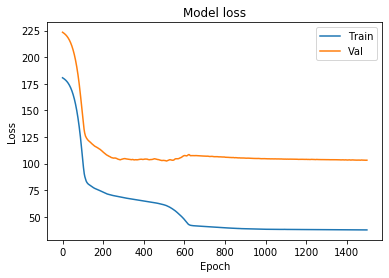

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [17]:
# serialize model to JSON
model_json = hist.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
hist.save_weights("model.h5")
print("Saved model to disk")

AttributeError: 'History' object has no attribute 'to_json'